In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys  

sys.path.insert(0, '../models')
from singlelocusmodelextended import SingleLocusModelExt
modelext = SingleLocusModelExt(k=1)

In [2]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [3]:
post_sam=np.load('../../data/posterior_samples.npz', allow_pickle=True)['arr_0']
F_A=np.load('../../data/F_A-data.npz', allow_pickle=True)['arr_0']

In [13]:
np.savez_compressed('../../data/posterior_samples', post_sam, allow_pickle=True)
np.savez_compressed('../../data/F_A-data', F_A, allow_pickle=True)

In [4]:
mean_FA=np.mean(F_A)
perc_FA=np.percentile(F_A,(2.5,97.5))
mean_FA, perc_FA

(0.16729464236904282, array([0.01540451, 0.36984928]))

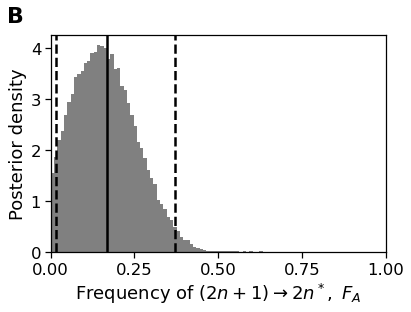

In [5]:
plt.hist(F_A, 100, density=True,color='grey')
plt.xlabel(r'Frequency of $(2n+1)\rightarrow  2n^*,\ F_A$')
plt.ylabel('Posterior density')
plt.axvline(x=mean_FA,color='k')
plt.axvline(x=perc_FA[0],color='k',ls='--')
plt.axvline(x=perc_FA[1],color='k',ls='--')
plt.xlim([0,1])
plt.text(-.13, 4.5, 'B',  size=22, weight='bold')
plt.xticks([0, 0.25, 0.5, 0.75, 1]);
plt.savefig('../../figures/histo_100000.pdf');

In [6]:
aneu_dom = F_A>.5
sum(aneu_dom), sum(aneu_dom)/len(F_A), len(F_A) #absolute number of cases where F_A is greater than 0.5, its fraction of the whole

(489, 0.00489, 100000)

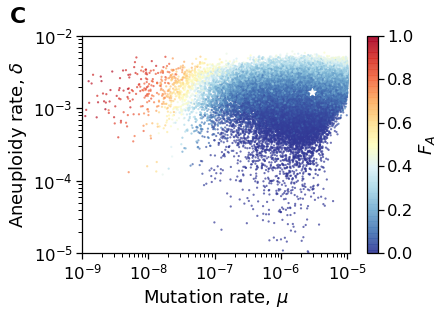

In [31]:
plt.scatter(post_sam[:,1],post_sam[:,2], c=F_A, cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=.7, s=5, rasterized=True)
plt.colorbar(label='$F_A$')
plt.scatter(2.9e-6,1.7e-3,marker='*',c='w',s=60)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mutation rate, $\mu$')
plt.ylabel('Aneuploidy rate, $\delta$')
plt.xlim([1e-9,1.1e-5])
plt.ylim([1e-5,1e-2])
plt.text(8e-11, .015, 'C', size=22, weight='bold')
plt.savefig('../../figures/scatter100000_log_star.pdf',dpi=500);

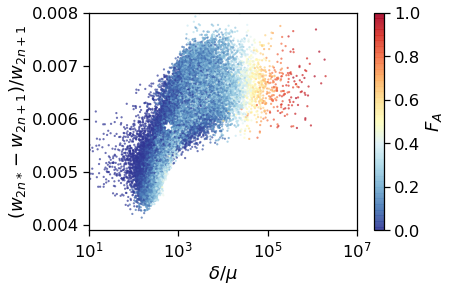

In [9]:
plt.scatter(post_sam[:,2]/post_sam[:,1],post_sam[:,5]/post_sam[:,3]-1, c=F_A, cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=.7, s=5, rasterized=True)
plt.colorbar(label='$F_A$')
plt.scatter(1.7e-3/2.9e-6,1.028/1.022-1,marker='*',c='w',s=60)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('$\delta/\mu$')
plt.ylabel('$(w_{2n*}-w_{2n+1})/w_{2n+1}$')
plt.xlim([10,1e7])
plt.ylim([.0039,.008])
plt.savefig('../../figures/scatter100000_rater_fitr_from_wt.pdf',dpi=500);

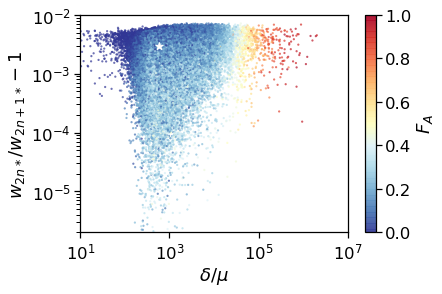

In [8]:
plt.scatter(post_sam[:,2]/post_sam[:,1],post_sam[:,5]/post_sam[:,4]-1, c=F_A, cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=.7, s=5, rasterized=True)
plt.colorbar(label='$F_A$')
plt.scatter(1.7e-3/2.9e-6,1.028/1.025-1,marker='*',c='w',s=60)
#plt.axhline(0,color='k')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\delta/\mu$')
plt.ylabel('$w_{2n*}/w_{2n+1*}-1$')
plt.xlim([10,1e7])
plt.ylim([2e-6,1e-2])
plt.savefig('../../figures/scatter100000_rater_fitr_mut.pdf',dpi=500);

## MAP progress plot

In [44]:
def simTP(μ, δ, w1, w2, w3, repetition=50, max_gen=5e6, seed=10, fixation=0.999):
    return modelext.run_simulations(6.425e6, μ, δ, δ,
 w1, w2, w3, repetitions=repetition, max_gen=5e4 ,seed=seed, clonal_intf=True, fixation=fixation)

In [45]:
simMAP=simTP(2.942e-6, 1.722e-3, 1.022, 1.025, 1.028) #simulate the MAP

In [37]:
np.savez_compressed('../../results/simMAP', np.array(simMAP, dtype=object), allow_pickle=True)

In [32]:
simMAP=np.load('../../results/simMAP.npz', allow_pickle=True)['arr_0']
simMAP_totalfix=np.array(simMAP[1])
totalfix_MAP=simMAP_totalfix[:,-1,:]+simMAP_totalfix[:,-2,:]
simMAP_2nstar=np.array([np.vstack((simMAP_totalfix[x],totalfix_MAP[x]))for x in range(len(totalfix_MAP))])
np.shape(simMAP_2nstar),np.shape(simMAP_totalfix)

((2398, 6, 50), (2398, 5, 50))

In [33]:
simMAP_totalfix[:,1,:].max(axis=0).min(), simMAP_totalfix[:,2,:].max(axis=0).max() #highest frequency of 2n+1, highest frequency of 2n+1*

(0.980132607003891, 0.004782256809338521)

In [34]:
blue,yellow,green,red,pink,brown,pink2,grey,yellow2,blue2 = sns.color_palette("colorblind", 10)
sns.color_palette("colorblind", 10)

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

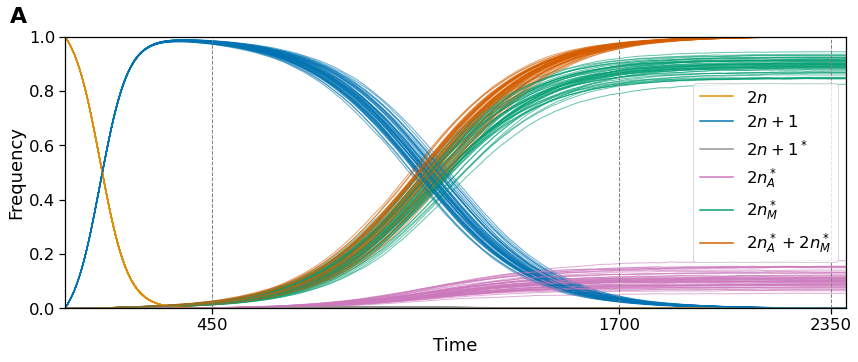

In [35]:
ax=modelext.plot_progress(np.array(simMAP_2nstar), 0, ['$2n$','$2n+1$','$2n+1^*$',r'$2n^*_A$',r'$2n^*_M$',r'$2n^*_A+2n^*_M$'], [yellow,blue,grey,pink,green,red],fixation=0.9999, alpha=.6, legend=True, xlim=(0,len(totalfix_MAP)), lw=1)
[modelext.plot_progress(np.array(simMAP_2nstar), x, ['2n','2n+1','$2n+1^*$',r'$2n^*_A$',r'$2n^*_M$','$2n^*$(total)'], [yellow,blue,grey,pink,green,red],fixation=0.9999, ax=ax, alpha=.6, legend=False, lw=1) for x in range(50)]
plt.axvline(450,linestyle='--',linewidth=1, color='grey')
plt.axvline(1700,linestyle='--',linewidth=1, color='grey')
plt.axvline(2350,linestyle='--',linewidth=1, color='grey')
plt.xticks([450, 1700, 2350])
plt.text(-.07, 1.05, 'A', transform=ax.transAxes, size=22, weight='bold')
#plt.xlim([0,300])
#plt.ylim([0,.02])
plt.savefig('../../figures/full_dynamic_MAP.pdf');